In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

train_df = pd.read_csv('./input/train.csv', index_col=0)

bsmt_columns = ['SalePrice','BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
                   'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF']
ground_columns = ['SalePrice','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea']

In [ ]:
# bsmt_df.groupby('BsmtCond').size()
# Fa      45
# Gd      65
# Po       2
# TA    1311

# bsmt_df.groupby('BsmtExposure').size()
# Av    221
# Gd    134
# Mn    114
# No    953

# bsmt_df.groupby('BsmtFinType1').size()
# ALQ    220
# BLQ    148
# GLQ    418
# LwQ     74
# Rec    133
# Unf    430

# bsmt_df.groupby('BsmtFinType2').size()
# ALQ      19
# BLQ      33
# GLQ      14
# LwQ      46
# Rec      54
# Unf    1256
# bsmt_df.groupby('BsmtQual').size()
# Ex    121
# Fa     35
# Gd    618
# TA    649

# df.loc[df['BsmtCond'].isnull(),'BsmtCond'] ='TA'
# df.loc[df['BsmtExposure'].isnull(),'BsmtExposure'] ='No'
# df.loc[df['BsmtFinType2'].isnull(),'BsmtFinType2'] ='Unf'
# df['BsmtExposure'].isnull().sum()

### 4.地下建筑
- BsmtQual（地下室的高度）: Height of the basement
- BsmtCond（地下室的一般状况）: General condition of the basement
- BsmtExposure: Walkout or garden level basement walls
- BsmtFinType1（地下室成品区的质量）: Quality of basement finished area
- BsmtFinSF1（1型成品平方英尺）: Type 1 finished square feet
- BsmtFinType2（第二个成品区的质量（如果存在））: Quality of second finished area (if present)
- BsmtFinSF2（2型成品平方英尺）: Type 2 finished square feet
- BsmtUnfSF（未完工的地下室面积/平方英尺）: Unfinished square feet of basement area
- TotalBsmtSF（总计：地下室总面积/平方英尺）: Total square feet of basement area

In [84]:
bsmt_df = train_df.loc[:, bsmt_columns]
bsmt_df.head()

,SalePrice,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF
Id,,,,,,,,,,
1,208500,Gd,TA,No,GLQ,706,Unf,0,150,856
2,181500,Gd,TA,Gd,ALQ,978,Unf,0,284,1262
3,223500,Gd,TA,Mn,GLQ,486,Unf,0,434,920
4,140000,TA,Gd,No,ALQ,216,Unf,0,540,756
5,250000,Gd,TA,Av,GLQ,655,Unf,0,490,1145


In [85]:
###数据比较均衡，无太多缺失, obj和int型各一半
bsmt_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 10 columns):
SalePrice       1460 non-null int64
BsmtQual        1423 non-null object
BsmtCond        1423 non-null object
BsmtExposure    1422 non-null object
BsmtFinType1    1423 non-null object
BsmtFinSF1      1460 non-null int64
BsmtFinType2    1422 non-null object
BsmtFinSF2      1460 non-null int64
BsmtUnfSF       1460 non-null int64
TotalBsmtSF     1460 non-null int64
dtypes: int64(5), object(5)
memory usage: 165.5+ KB


### 4-1. 地下特征分析1
- 1.这个Gd加上就会很贵，高度越高，价格涨幅也越贵，应该是比较高级的一种地下室质量（搜了一下，Gd好像是防水）
- 2.Ex也很明显，看名字应该是什么扩充，有就很贵，高出其他一大截。。。管他呢，反正做得越好越贵呗
- 3.FinType那两个属性，GLQ、ALQ贵一些，UNF离群点多。。。


- 类别属性统一做one-hot处理：'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1','BsmtFinType2'

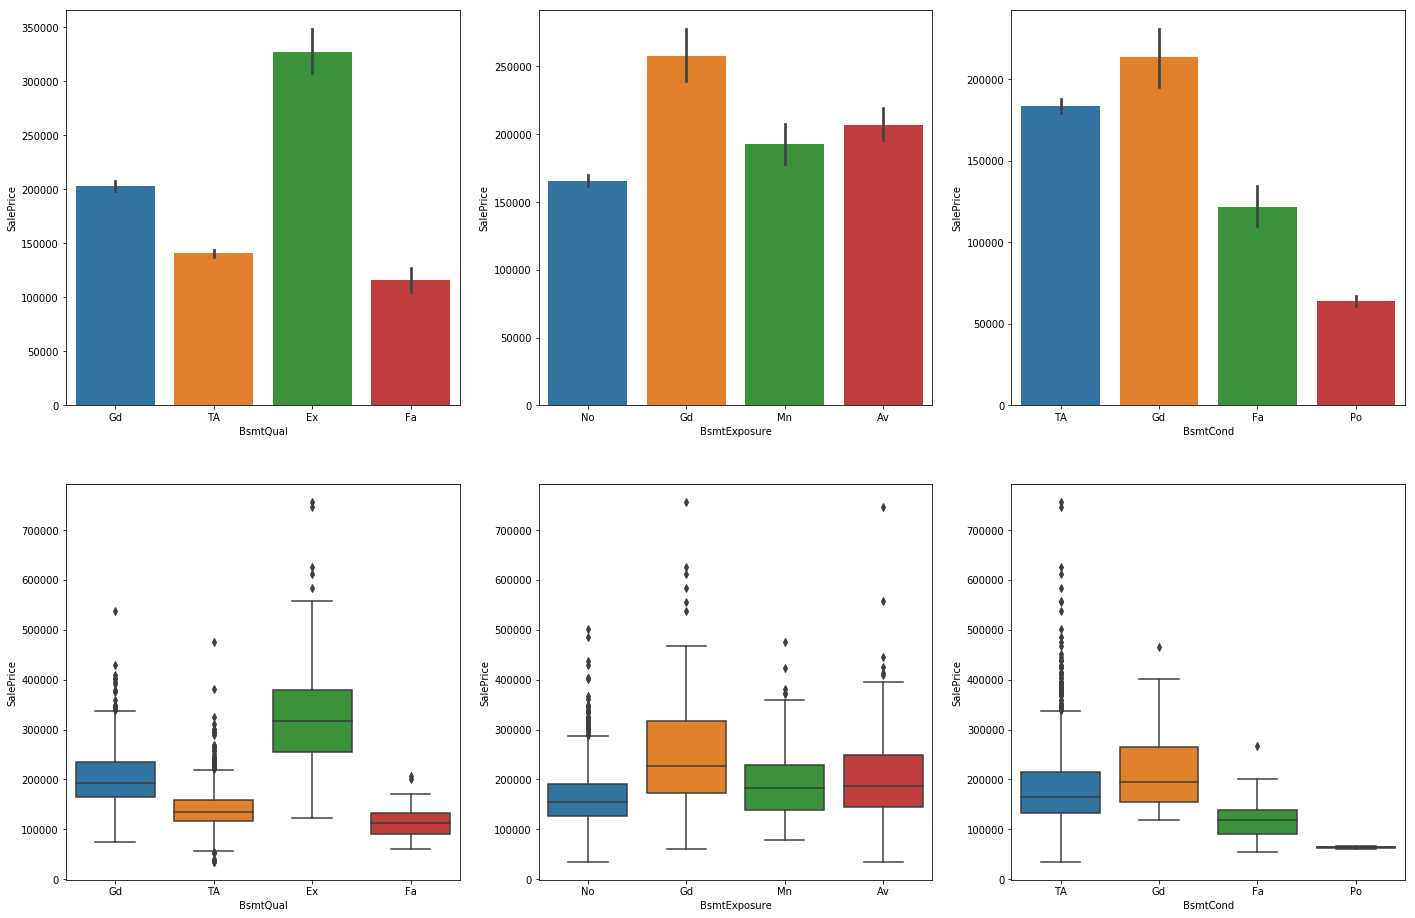

In [3]:
sns.set_context({"figure.figsize": (24, 16)})

plt.subplot2grid((2,3),(0,0))
sns.barplot(x='BsmtQual', y='SalePrice', data=bsmt_df)
plt.subplot2grid((2,3),(1,0))
sns.boxplot(x='BsmtQual', y='SalePrice', data=bsmt_df)


plt.subplot2grid((2,3),(0,1))
sns.barplot(x='BsmtExposure', y='SalePrice', data=bsmt_df)
plt.subplot2grid((2,3),(1,1))
sns.boxplot(x='BsmtExposure', y='SalePrice', data=bsmt_df)


plt.subplot2grid((2,3),(0,2))
sns.barplot(x='BsmtCond', y='SalePrice', data=bsmt_df)
plt.subplot2grid((2,3),(1,2))
sns.boxplot(x='BsmtCond', y='SalePrice', data=bsmt_df)



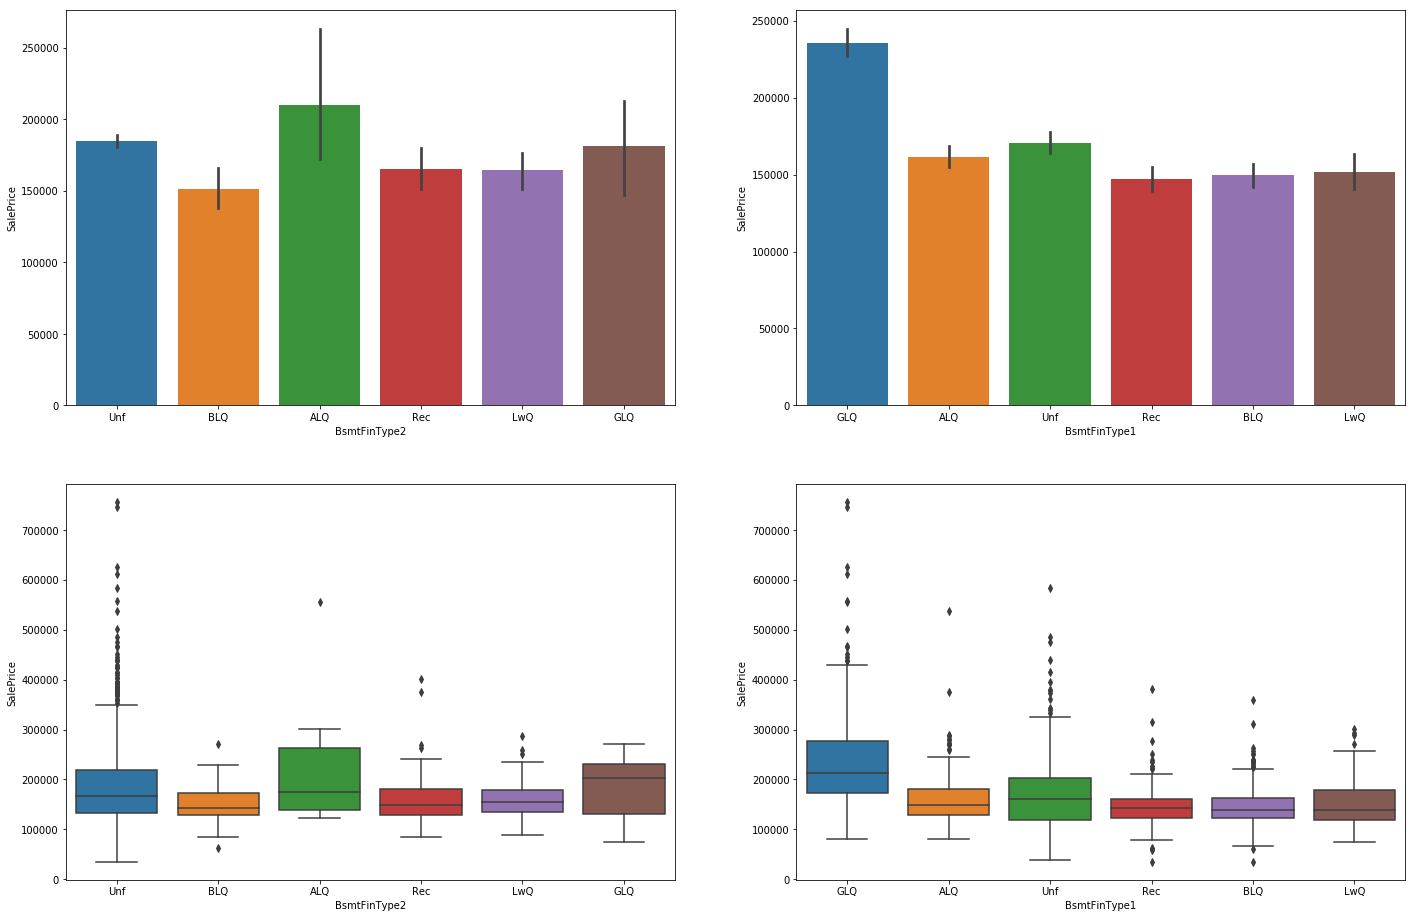

In [18]:
sns.set_context({"figure.figsize": (24, 16)})

plt.subplot2grid((2,2),(0,0))
sns.barplot(x='BsmtFinType2', y='SalePrice', data=bsmt_df)
plt.subplot2grid((2,2),(1,0))
sns.boxplot(x='BsmtFinType2', y='SalePrice', data=bsmt_df)

plt.subplot2grid((2,2),(0,1))
sns.barplot(x='BsmtFinType1', y='SalePrice', data=bsmt_df)
plt.subplot2grid((2,2),(1,1))
sns.boxplot(x='BsmtFinType1', y='SalePrice', data=bsmt_df)

### 地下特征-数值属性

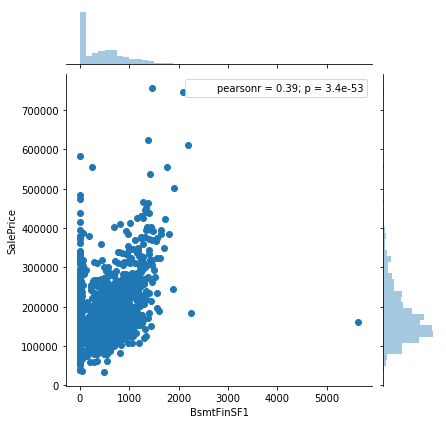

In [26]:
sns.set_context({"figure.figsize": (6, 6)})

sns.jointplot(x='BsmtFinSF1', y='SalePrice', data=bsmt_df)

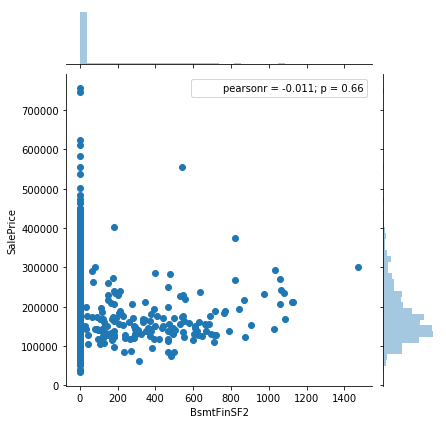

In [27]:
sns.jointplot(x='BsmtFinSF2', y='SalePrice', data=bsmt_df)

### 4-2 地下特征分析2 
- 散点图不够明显，但是也能看出来0和其他的明显有区别
- group按均值（中位数）看看：这次明显了，按分布分桶(数字待校准)
- BsmtFinSF1：0 (0,1500) (1500,2200) >=2200
- BsmtFinSF2：0 (0,1100) >1100


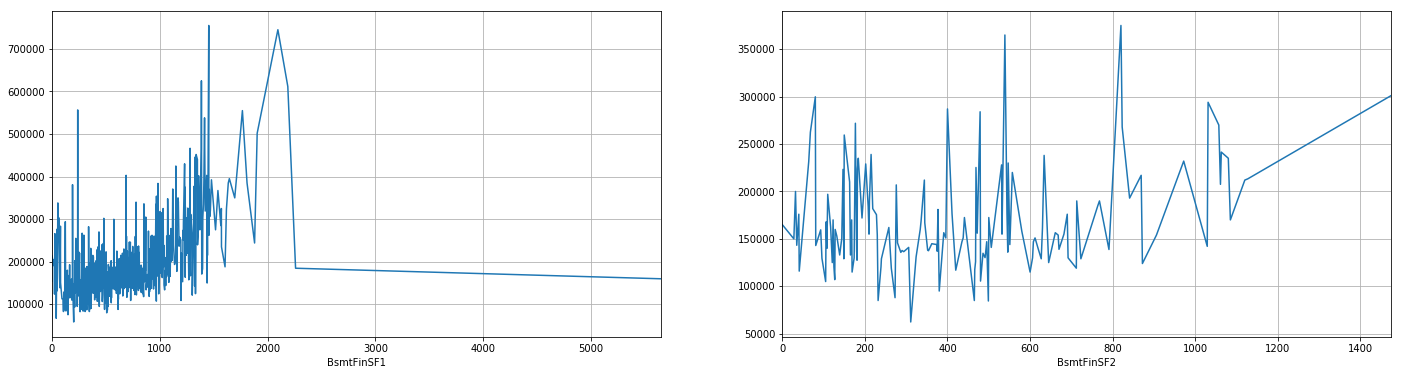

In [36]:
sns.set_context({"figure.figsize": (24, 6)})

plt.subplot2grid((1,2),(0,0))

bsmt_df.groupby('BsmtFinSF1').agg(np.median)['SalePrice'].plot(grid=True)
plt.subplot2grid((1,2),(0,1))
bsmt_df.groupby('BsmtFinSF2').agg(np.median)['SalePrice'].plot(grid=True)

###  地下特征分析3，同样方式分析这两个：

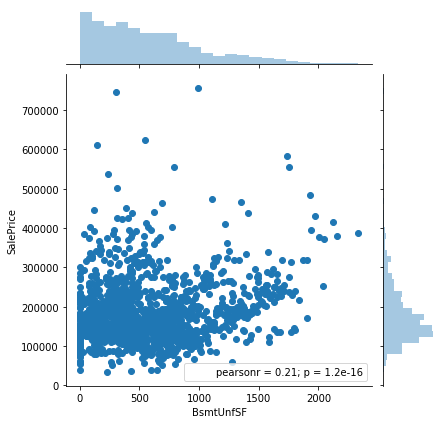

In [38]:
sns.set_context({"figure.figsize": (6, 6)})

sns.jointplot(x='BsmtUnfSF', y='SalePrice', data=bsmt_df)

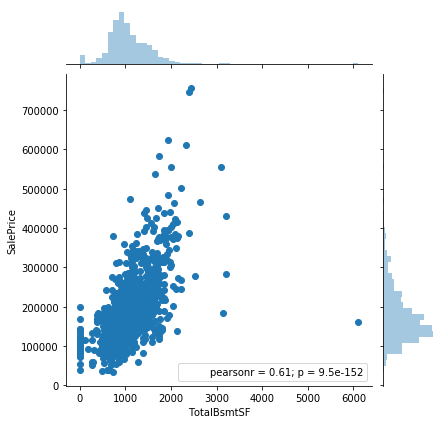

In [39]:
sns.jointplot(x='TotalBsmtSF', y='SalePrice', data=bsmt_df)

### 4-3 地下特征分析3
- BsmtUnfSF影响是逐渐降低，TotalBsmtSF是先升后降，同样，做分桶
    - 'BsmtUnfSF': (0,1500) >1500
    - 'TotalBsmtSF': (0,500) (500,2000) (2000,3300) >3300

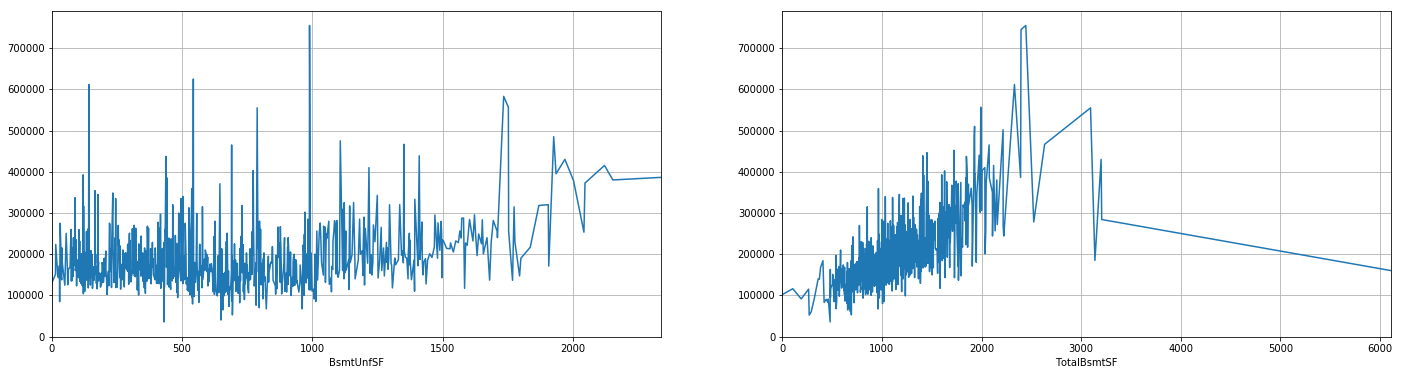

In [40]:
sns.set_context({"figure.figsize": (24, 6)})

plt.subplot2grid((1,2),(0,0))

bsmt_df.groupby('BsmtUnfSF').agg(np.median)['SalePrice'].plot(grid=True)
plt.subplot2grid((1,2),(0,1))
bsmt_df.groupby('TotalBsmtSF').agg(np.median)['SalePrice'].plot(grid=True)

### 5.地上建筑
- 地上属性虽然少，但是肯定影响很大，😂毕竟这才是房子主体


- 1stFlrSF（1楼面积/平方英尺）: First Floor square feet
- 2ndFlrSF（2楼面积/平方英尺）: Second floor square feet
- LowQualFinSF（低质量的成品/平方英尺（所有楼层））: Low quality finished square feet (all floors)
- GrLivArea（地上居住面积/平方英尺）: Above grade (ground) living area square feet





In [5]:
ground_df = train_df.loc[:, ground_columns]
ground_df.head()

,SalePrice,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea
Id,,,,,
1,208500,856,854,0,1710
2,181500,1262,0,0,1262
3,223500,920,866,0,1786
4,140000,961,756,0,1717
5,250000,1145,1053,0,2198


In [7]:
#完全无缺失，都是数值型数据
ground_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 5 columns):
SalePrice       1460 non-null int64
1stFlrSF        1460 non-null int64
2ndFlrSF        1460 non-null int64
LowQualFinSF    1460 non-null int64
GrLivArea       1460 non-null int64
dtypes: int64(5)
memory usage: 68.4 KB


### 前边感觉这个折线图对数值类型变化效果好，直接上折线图

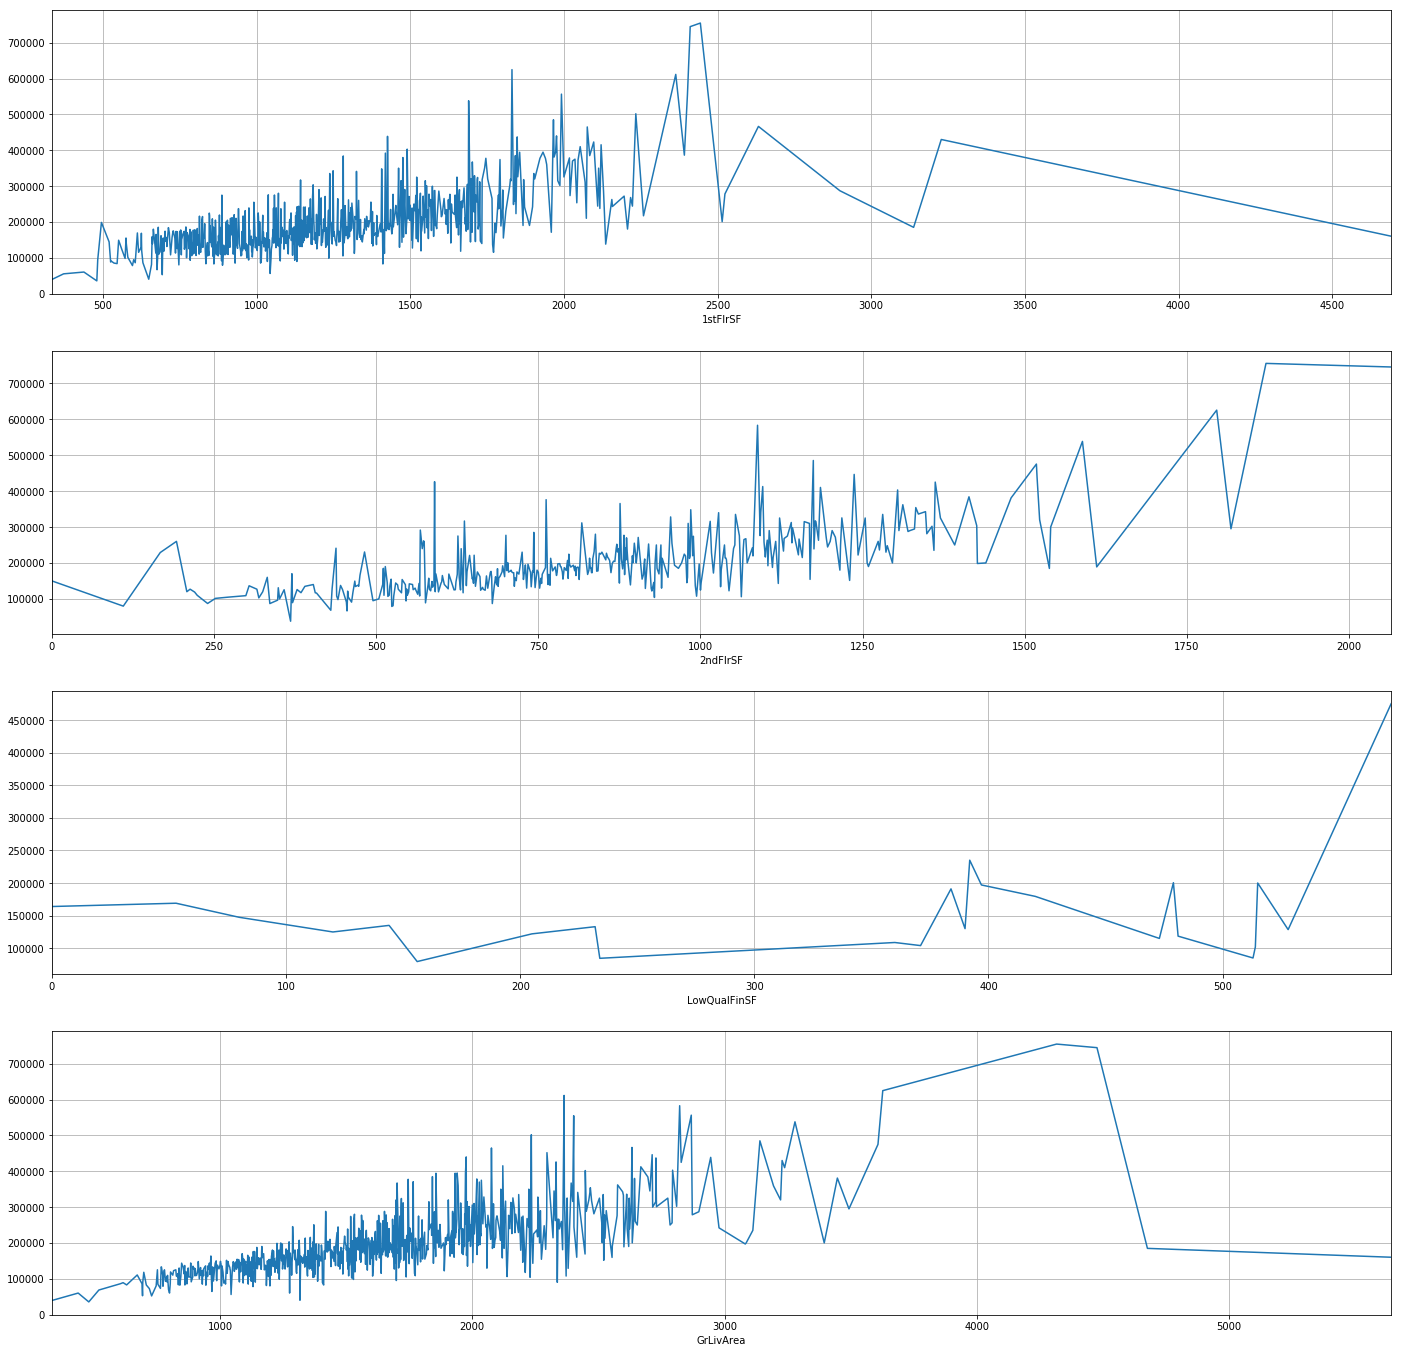

In [45]:
sns.set_context({"figure.figsize": (24, 24)})

plt.subplot2grid((4,1),(0,0))

ground_df.groupby('1stFlrSF').agg(np.median)['SalePrice'].plot(grid=True)
plt.subplot2grid((4,1),(1,0))
ground_df.groupby('2ndFlrSF').agg(np.median)['SalePrice'].plot(grid=True)

plt.subplot2grid((4,1),(2,0))
ground_df.groupby('LowQualFinSF').agg(np.median)['SalePrice'].plot(grid=True)

plt.subplot2grid((4,1),(3,0))
ground_df.groupby('GrLivArea').agg(np.median)['SalePrice'].plot(grid=True)

### 再用散点图看看

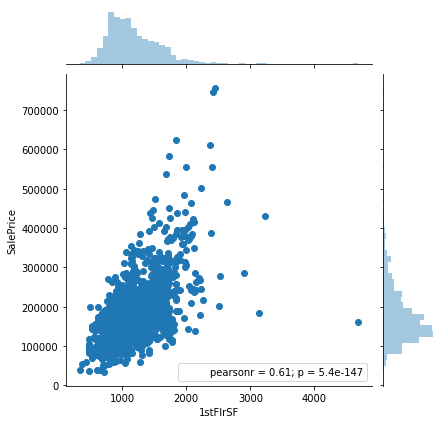

In [48]:
sns.jointplot(x='1stFlrSF', y='SalePrice', data=ground_df)



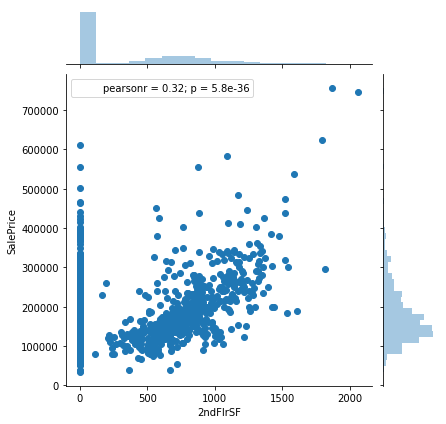

In [49]:
sns.jointplot(x='2ndFlrSF', y='SalePrice', data=ground_df)



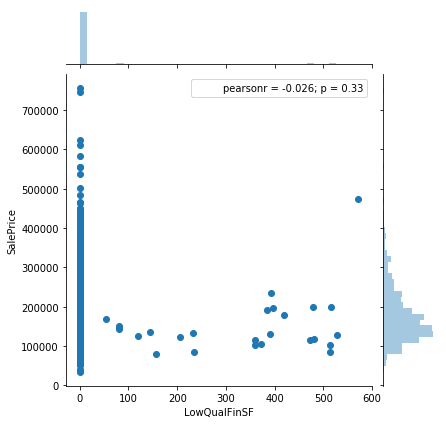

In [50]:
sns.jointplot(x='LowQualFinSF', y='SalePrice', data=ground_df)

# '','2ndFlrSF','',''

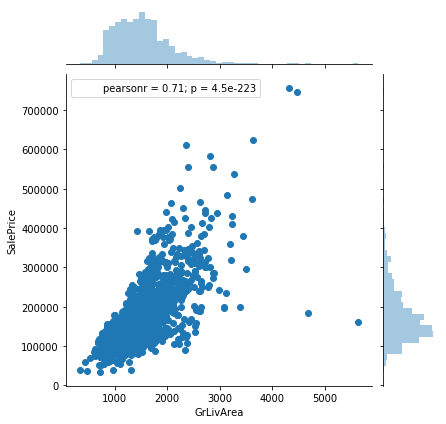

In [51]:
sns.jointplot(x='GrLivArea', y='SalePrice', data=ground_df)



### 地上建筑分析
- 1.虽然都是涨，但是大到一定面积，价格比较平稳了，甚至不升反降
- 2.太大了以后，低质量面积开始保持平稳，（500以上）越多越贵？应该是房子大了越贵，大了低质量的就多了？
- 3.大致上都是线性关系，但是有一些噪声点得注意，有些没有2楼，低质量较少的
- 继续分桶
    - '1stFlrSF', <400 (400,700) (700,2200) (2200,2500) (2500,3300) >3300
    - '2ndFlrSF', ==0 (0,100) (100,300) (300,500) (300,1400) (1400,1900) >1900
    - 'LowQualFinSF', ==0 和 !=0
    - 'GrLivArea' <500 (500,2700) (2700,3700) (3700,4700) >4700

# 4.地下建筑特征处理
### 4-1. 地下特征分析1
- 类别属性统一做one-hot处理：'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1','BsmtFinType2'

### 4-2 地下特征分析2 
- 散点图不够明显，但是也能看出来0和其他的明显有区别
- group按均值（中位数）看看：这次明显了，按分布分桶(数字待校准)
- BsmtFinSF1：0 != 0
- BsmtFinSF2：0 != 0
### 4-3 地下特征分析3
    - 'BsmtUnfSF': (0,1500) >1500
    - 'TotalBsmtSF': (0,500) (500,2000) (2000,3300) >3300
    

# 5.地面建筑特征处理


- '1stFlrSF', <400 (400,700) (700,2200) (2200,2500) (2500,3300) >3300
- '2ndFlrSF', ==0 和 !=0
- 'LowQualFinSF', ==0 和 !=0
- 'GrLivArea' <500 (500,2700) (2700,3700) (3700,4700) >4700